# Regression Model with Dummy Variable (First Example)

### Intro and objectives

### In this lab you will learn:
1. examples of simple regression models with dummy variables.
2. how to fit simple regression models in Python.


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit a simple regression model and include dummy variables.
* Examples of simple regression models
* How to interpret the results obtained

In [1]:
!pip install wooldridge
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 4.3 MB/s 


# Example 2. Wage and Education

#### For the population of people in the workforce in 1976, let $y=wage$, where wage is measured in dollars per hour. Thus, for a particular person, if $wage=6.75$, the hourly wage is 6.75 dollars. Let $x=educ$ denote years of schooling; for example, $educ=12$ corresponds to a complete high school education.

#### In this example we include the dummy variable female that takes value 1 if the observation corresponds to a female and 0 otherwise.

#### To study the gender effect on salary we fit the following model



$ wage=\beta_0+\delta_0*female+\beta_1*educ+\beta_2*exper+\beta_3*tenure+u $



### Using the data in WAGE1 where n=526 individuals

In [2]:
Wages = woo.dataWoo('wage1')


In [3]:
Wages.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [4]:
Wages.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


In [5]:
type(Wages)

pandas.core.frame.DataFrame

In [6]:
# We impose a simple, linear, model: 
# We specify CeoSalaries as the empirical dataset

reg = smf.ols(formula='wage ~ female+educ+exper+tenure', data=Wages)

In [7]:
# We fit the model
results = reg.fit()


In [8]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept   -1.567939
female      -1.810852
educ         0.571505
exper        0.025396
tenure       0.141005
dtype: float64



## Based on the previous we have fitted the following model:


$ wage=-1.56-1.81*female+0.57*educ+0.025*exper+0.14*tenure+u $



## How do we interpret the equation?

#### Based on the fitted model, If we take a woman and a man with the same levels of education, experience, and tenure, the woman earns, on average, $1.81 less per hour than the man.

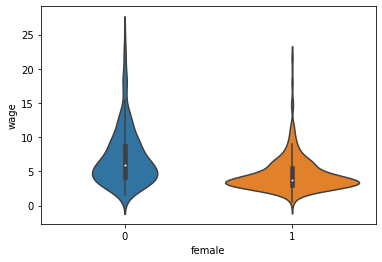

In [11]:

sns.violinplot(data=Wages, x="female", y="wage")